# Projet IA - MGL869
## Import du jeu de données

In [575]:
import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, I/O de fichier CSV (par ex. pd.read_csv)
import seaborn as sns # bibliothèque de tracé qui utilise matplot
import matplotlib.pyplot as plt # pour tracer certains paramètres dans seaborn
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv", dtype={
  'Gender':'category',
  'CAEC':'category',
  'CALC':'category',
  'MTRANS':'category',
  'NObeyesdad':'category',
})
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### Supprimer valeurs manquantess

In [576]:
df.dropna(inplace=True)

## Préparation du jeu de données
### Création d'un nouveau df

In [577]:
df2 = df.copy()

### Transformation colonne numerique en colonne categorielle

In [578]:
df2["family_history_with_overweight"] = df["family_history_with_overweight"].apply(lambda v: v == "yes")
df2["FAVC"] = df["FAVC"].apply(lambda v: v == "yes")
df2["SMOKE"] = df["SMOKE"].apply(lambda v: v == "yes")
df2["SCC"] = df["SCC"].apply(lambda v: v == "yes")


### Rapport sur les données numériques

In [579]:
df2.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Age

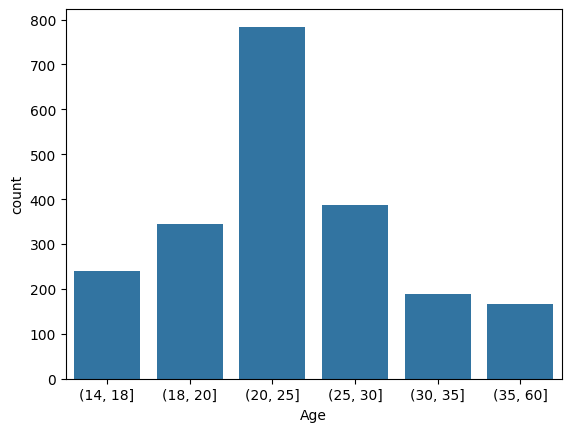

In [580]:
interval = (14,18, 20, 25, 30, 35, 60)
df2["Age"] = pd.cut(df2['Age'], interval)
sns.countplot(data=df2, x='Age')
plt.show()

### Taille

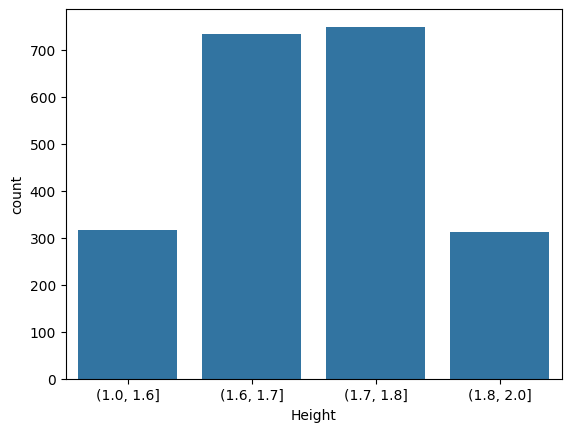

In [581]:
interval = (1,1.6,1.70, 1.80,2)
df2["Height"] = pd.cut(df2['Height'], interval)
sns.countplot(data=df2, x='Height')
plt.show()

### Poids

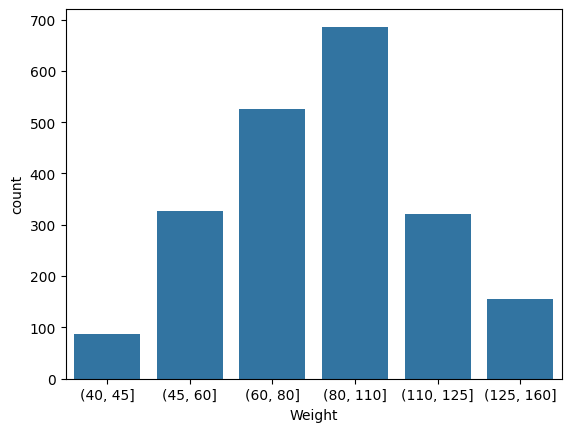

In [582]:
interval = (40,45,60,80,110, 125,160)
df2["Weight"] = pd.cut(df2['Weight'], interval)
sns.countplot(data=df2, x='Weight')
plt.show()

### NCP
Je pense que NCP est inutile car il y a majoritairement qu'une seule valeur.

NCP
3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: count, Length: 635, dtype: int64
NCP
Three              1203
Between 1 y 2       199
More than three      69
Name: count, dtype: int64


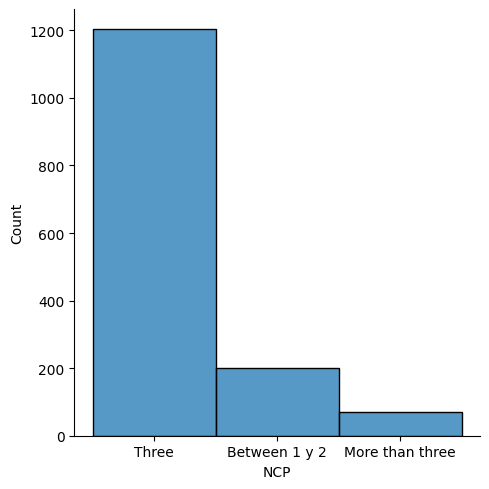

In [583]:
print(df2['NCP'].value_counts())
map_dict = {1.0: 'Between 1 y 2', 3.0: 'Three', 4.0: 'More than three'}
df2 = df2[df2['NCP'].isin(map_dict.keys())]
df2['NCP'] = df2['NCP'].replace(map_dict)

print(df2['NCP'].value_counts())
sns.displot(df2['NCP'])
plt.show()

### FCVC

FCVC
3.000000    581
2.000000    463
1.000000     32
2.442536      2
2.392665      2
           ... 
2.951591      1
2.661556      1
2.512719      1
2.417635      1
1.841990      1
Name: count, Length: 392, dtype: int64
FCVC
Always       581
Sometimes    463
Never         32
Name: count, dtype: int64


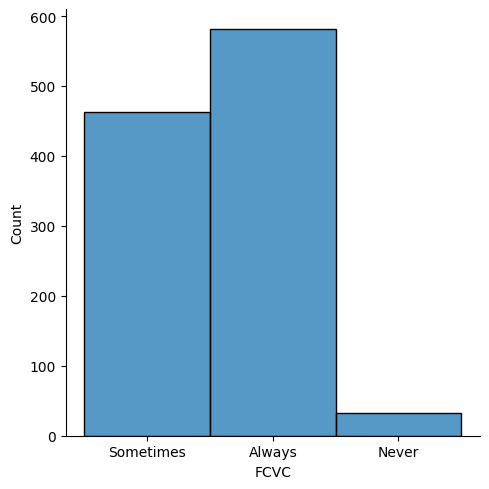

In [584]:
print(df2['FCVC'].value_counts())
map_dict = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
df2 = df2[df2['FCVC'].isin(map_dict.keys())]
df2['FCVC'] = df2['FCVC'].replace(map_dict)

print(df2['FCVC'].value_counts())
sns.displot(df2['FCVC'])
plt.show()


#### CH2O

CH2O
2.000000    321
1.000000    151
3.000000    136
2.843777      2
2.852339      1
           ... 
1.759803      1
1.440526      1
1.613829      1
1.234943      1
2.863513      1
Name: count, Length: 470, dtype: int64
CH2O
1L< X <2 L    321
< 1L          151
> 2 L         136
Name: count, dtype: int64


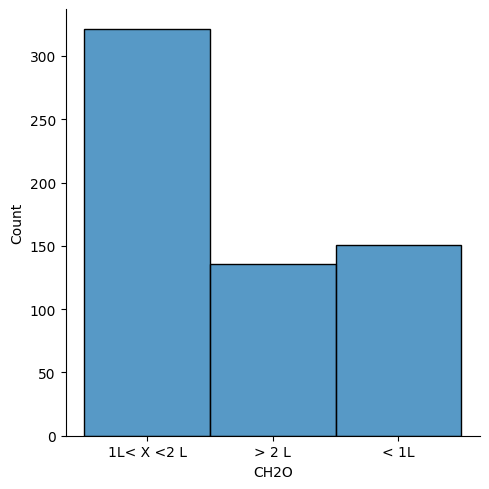

In [585]:
print(df2['CH2O'].value_counts())
map_dict = {1: '< 1L', 2: '1L< X <2 L', 3: '> 2 L'}
df2 = df2[df2['CH2O'].isin(map_dict.keys())]
df2['CH2O'] = df2['CH2O'].replace(map_dict)

print(df2['CH2O'].value_counts())
sns.displot(df2['CH2O'])
plt.show()


### FAF - How often do you have physical activity? 

FAF
0.000000    183
1.000000    173
2.000000    115
3.000000     72
1.783858      1
           ... 
2.721646      1
2.939733      1
2.040816      1
2.847761      1
1.467863      1
Name: count, Length: 69, dtype: int64
FAF
No        183
1 or 2    173
2 or 4    115
4 or 5     72
Name: count, dtype: int64


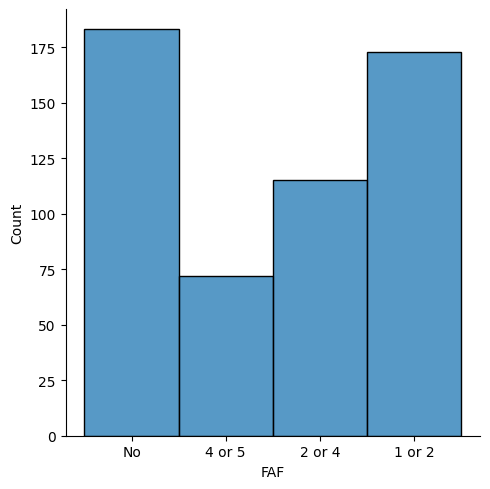

In [586]:
print(df2['FAF'].value_counts())
map_dict = {0: 'No',1: '1 or 2', 2: '2 or 4', 3: '4 or 5'}
df2 = df2[df2['FAF'].isin(map_dict.keys())]
df2['FAF'] = df2['FAF'].replace(map_dict)

print(df2['FAF'].value_counts())
sns.displot(df2['FAF'])
plt.show()

### TUE - How much time do you use technological devices such as cell phone, videogames, television, computer and others?

TUE
0.000000    267
1.000000    181
2.000000     83
1.593704      1
1.329237      1
1.525597      1
1.339232      1
1.112489      1
0.018877      1
1.301385      1
1.481890      1
0.105936      1
0.233314      1
1.014808      1
0.931721      1
Name: count, dtype: int64
TUE
0e2 hours            267
3e5 hour             181
More than 5 hours     83
Name: count, dtype: int64


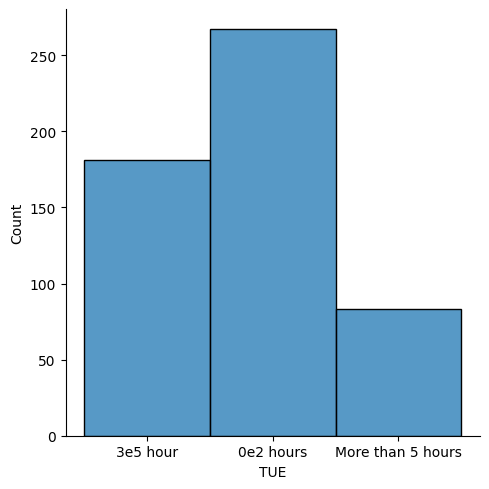

In [587]:
print(df2['TUE'].value_counts())
map_dict = {0: '0-2 hours',1: '3-5 hour', 2: 'More than 5 hours'}
df2 = df2[df2['TUE'].isin(map_dict.keys())]
df2['TUE'] = df2['TUE'].replace(map_dict)

print(df2['TUE'].value_counts())
sns.displot(df2['TUE'])
plt.show()

### Apercu des données traitées

In [588]:
df2

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,"(20, 25]","(1.6, 1.7]","(60, 80]",True,False,Sometimes,Three,Sometimes,False,1L< X <2 L,False,No,3e5 hour,no,Public_Transportation,Normal_Weight
1,Female,"(20, 25]","(1.0, 1.6]","(45, 60]",True,False,Always,Three,Sometimes,True,> 2 L,True,4 or 5,0e2 hours,Sometimes,Public_Transportation,Normal_Weight
2,Male,"(20, 25]","(1.7, 1.8]","(60, 80]",True,False,Sometimes,Three,Sometimes,False,1L< X <2 L,False,2 or 4,3e5 hour,Frequently,Public_Transportation,Normal_Weight
3,Male,"(25, 30]","(1.7, 1.8]","(80, 110]",False,False,Always,Three,Sometimes,False,1L< X <2 L,False,2 or 4,0e2 hours,Frequently,Walking,Overweight_Level_I
4,Male,"(20, 25]","(1.7, 1.8]","(80, 110]",False,False,Sometimes,Between 1 y 2,Sometimes,False,1L< X <2 L,False,No,0e2 hours,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,Female,"(35, 60]","(1.0, 1.6]","(60, 80]",True,True,Sometimes,Three,Sometimes,False,< 1L,False,No,0e2 hours,Sometimes,Automobile,Obesity_Type_I
1405,Male,"(20, 25]","(1.7, 1.8]","(80, 110]",True,True,Sometimes,Three,Sometimes,False,> 2 L,False,4 or 5,More than 5 hours,no,Public_Transportation,Obesity_Type_I
1406,Male,"(20, 25]","(1.7, 1.8]","(80, 110]",True,True,Sometimes,Three,Sometimes,False,> 2 L,False,4 or 5,More than 5 hours,no,Public_Transportation,Obesity_Type_I
1426,Male,"(20, 25]","(1.7, 1.8]","(80, 110]",True,True,Sometimes,Three,Sometimes,False,> 2 L,False,4 or 5,More than 5 hours,no,Public_Transportation,Obesity_Type_I


#### 

In [589]:
df2.dtypes

Gender                            category
Age                               category
Height                            category
Weight                            category
family_history_with_overweight        bool
FAVC                                  bool
FCVC                                object
NCP                                 object
CAEC                              category
SMOKE                                 bool
CH2O                                object
SCC                                   bool
FAF                                 object
TUE                                 object
CALC                              category
MTRANS                            category
NObeyesdad                        category
dtype: object